In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
from sklearn.impute import SimpleImputer

import env
import wrangle
from wrangle import wrangle_zillow


In [2]:
df = wrangle_zillow()

In [ ]:
df.head()

In [3]:
seed = 42

train, valid_test = train_test_split(df, test_size=0.3,
                                     random_state=seed)

valid, test = train_test_split(valid_test, test_size=0.5,
                               random_state=seed)

In [4]:
train.shape

(1466208, 7)

In [5]:
train.head()

,bedroom_cnt,bath_cnt,SqFt,tax_value,year_built,tax_amount,fips
781667,3,2.0,1718,484000,1951,6547.75,6037
1766333,4,2.0,1361,207712,1970,2280.74,6111
192985,2,2.0,2136,762857,1978,8056.38,6059
1465240,3,1.5,956,226704,1962,2399.60,6111
377201,4,2.0,1863,71360,1968,809.02,6111


In [10]:
train = train[train['SqFt'] < 100000]
train = train[train['bath_cnt'] < 10]
train = train[train['bedroom_cnt'] < 10]

In [11]:
train.shape

(1466206, 7)

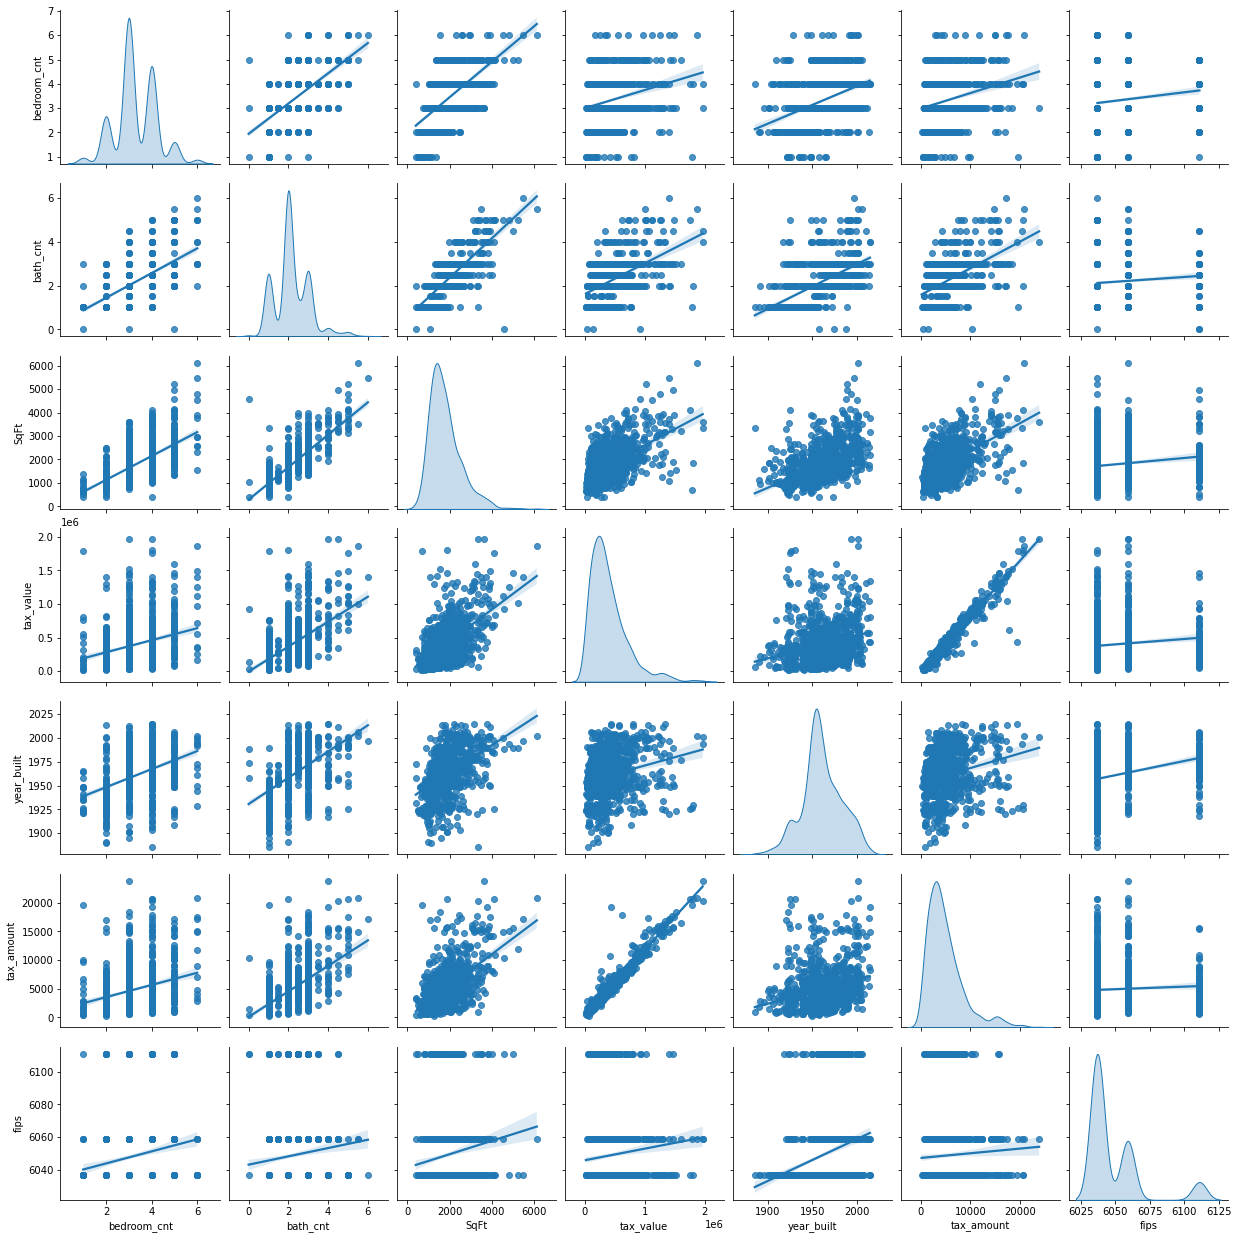

In [12]:
def plot_variable_pairs(df):
    sns.pairplot(data=df.sample(1000), kind='reg', diag_kind='kde')
    
plot_variable_pairs(train)

In [13]:
def plot_categorical_and_continuous_vars(df, categorical, continuous):
    df_sample = df.sample(1000)
    plt.figure()
    sns.stripplot(x=categorical, y=continuous, data=df_sample)
    plt.figure()
    sns.boxplot(x=categorical, y=continuous, data=df_sample)
    plt.figure()
    sns.barplot(x=categorical, y=continuous, data=df_sample)

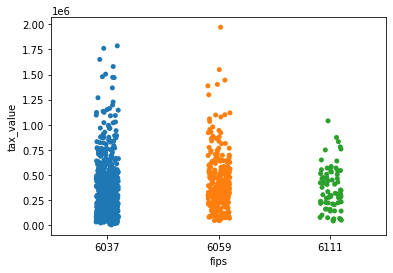

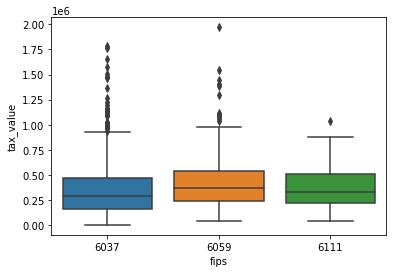

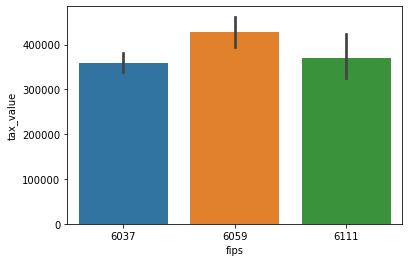

In [15]:
plot_categorical_and_continuous_vars(train, 'fips', 'tax_value')

In [16]:
train_corr = train.corr()
train_corr

,bedroom_cnt,bath_cnt,SqFt,tax_value,year_built,tax_amount,fips
bedroom_cnt,1.000000,0.627963,0.608787,0.275078,0.385929,0.276512,0.151661
bath_cnt,0.627963,1.000000,0.811610,0.510761,0.533374,0.512257,0.123700
SqFt,0.608787,0.811610,1.000000,0.583866,0.474028,0.580716,0.131306
tax_value,0.275078,0.510761,0.583866,1.000000,0.276117,0.975645,0.078903
year_built,0.385929,0.533374,0.474028,0.276117,1.000000,0.282582,0.306513
tax_amount,0.276512,0.512257,0.580716,0.975645,0.282582,1.000000,0.031662
fips,0.151661,0.123700,0.131306,0.078903,0.306513,0.031662,1.000000


<AxesSubplot:>

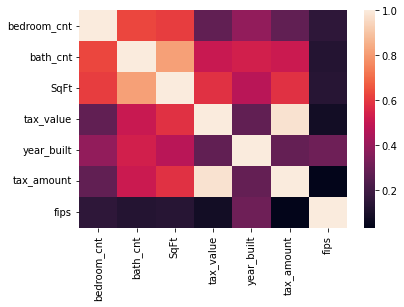

In [17]:
sns.heatmap(train_corr)